# PFRA 

### _Development Notebook_

__NOTE__ *Some settings are currently in place for PFRA Studies conducted by STARR II production studies. With time these will be transitioned to __general case options__.*

   - Assumes outputs written to zip files with '_out.zip' extensions
   - Assumes only one '.hdf' file in the out_zip
   - Assumes PFRA data structure with data stored on S3 with AWS credentials configured
   
   
--- 

### QA/QC
#### Global Errors Check

This notebook is intended to identify global issues in a model simulation that require follow-up responses from the modeler before the model can be used in *STARRII* PFRA studies.

Global issues currently implemented include:
 
 __1. Check Model inputs__
 
    A. Plan Information
    B. Plan Parameters
    C. Boundary Conditions 
     
__2. Check Results for each domain (2D Flow Area) in the model__
 
    A. Computational Summary & Depth Plots
    B. Domain Extents
    C. High Velocities at cell faces
 
 
Global issues *in development* include:
 - Mapping areas where Courant number exceeds indicated threshold.
 - Mapping areas where iteration counts exceed indicated threshold.


In [2]:
import sys;sys.path.append('../')
from hecrasio.core import ResultsZip
from hecrasio.qaqc import *

#### Read model output data 

*from AWS*




In [3]:
model_s3path = "s3://azavea/jwx_test/data/zip/Sacramento_P01_H06_E0001_out.zip"
model = ResultsZip(model_s3path, require_prj=False, pfra=False)

In [4]:
hdfResults_paths = [f for f in model.contents if '.hdf' in f]

In [5]:
hdfResults_path = hdfResults_paths[0]
rasPlan = HDFResultsFile(model, hdfResults_path)


### 1A. Plan Information

   

In [6]:
rasPlan.Plan_Information

,Results
Base Output Interval,15MIN
Computation Time Courant Method,Representative Length/Velocity
Computation Time Step Base,1MIN
Computation Time Step Count To Double,4
Computation Time Step Max Courant,2.5
Computation Time Step Max Doubling,2
Computation Time Step Max Halving,2
Computation Time Step Min Courant,0.45
Flow Filename,Sacramento_P01_H00.u0
Flow Title,E0001


### 1B. Plan Parameters


In [7]:
rasPlan.Plan_Parameters

,Results
1D Cores,0
1D Methodology,Finite Difference
1D2D Flow Tolerance,0.1
1D2D MaxIter,0
1D2D Minimum Flow Tolerance,1
1D2D WS Tolerance,0.01
2D Boundary Condition Ramp Up Fraction,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ..."
2D Boundary Condition Volume Check,"[b'False', b'False', b'False', b'False', b'Fal..."
2D Cores,0
2D Coriolis,False


### 1C. Boundary Conditions 

#### Input hydrographs

* Need to update notebook for multiple domains

In [14]:
def show_results(domains:list) -> None:
    """Wrapper function plotting descriptive statistics, extreme edges, boundary conditions and velocity values."""
    
    if len(domains) > 1:
        results = {domain: DomainResults(model, rasPlan, domain) for domain in domains}
        for domain, result in results.items():
            plot_descriptive_stats(result.Describe_Depths, result.Perimeter, domain)
            plot_extreme_edges(result.Extreme_Edges, result.Perimeter, mini_map=rasPlan.domain_polys)
            plotBCs(result, domain) 
            velCheckMain(result, domain, plot_tseries=3)

    else:
        domain = domains[0]
        results = DomainResults(model, rasPlan, domain)
        plot_descriptive_stats(results.Describe_Depths, results.Perimeter, domain)
        plot_extreme_edges(results.Extreme_Edges, results.Perimeter)
        plotBCs(results)
        velCheckMain(result, domain, plot_tseries=3)

No Velocity Errors Found in Domain D24
No Velocity Errors Found in Domain D25


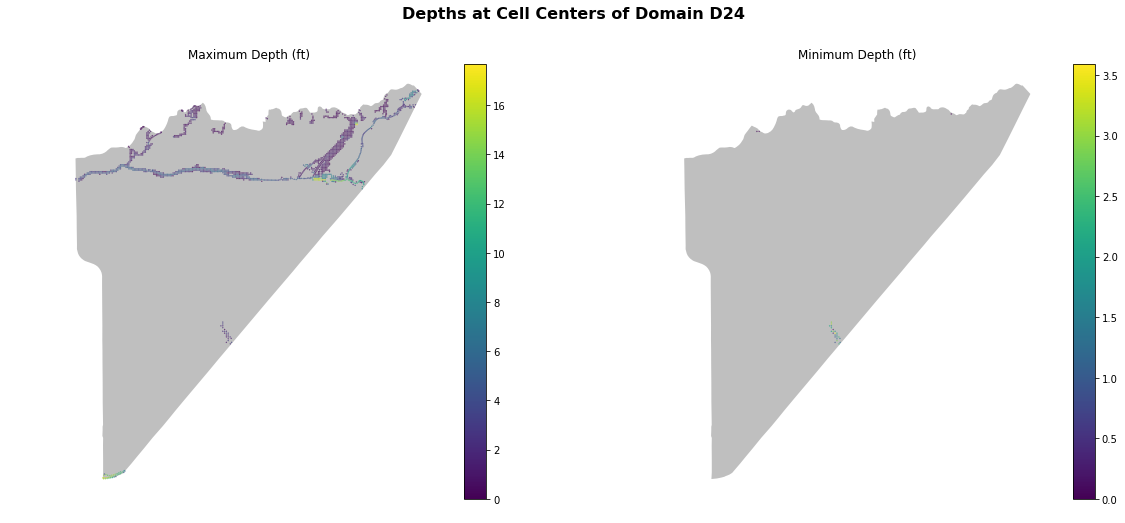

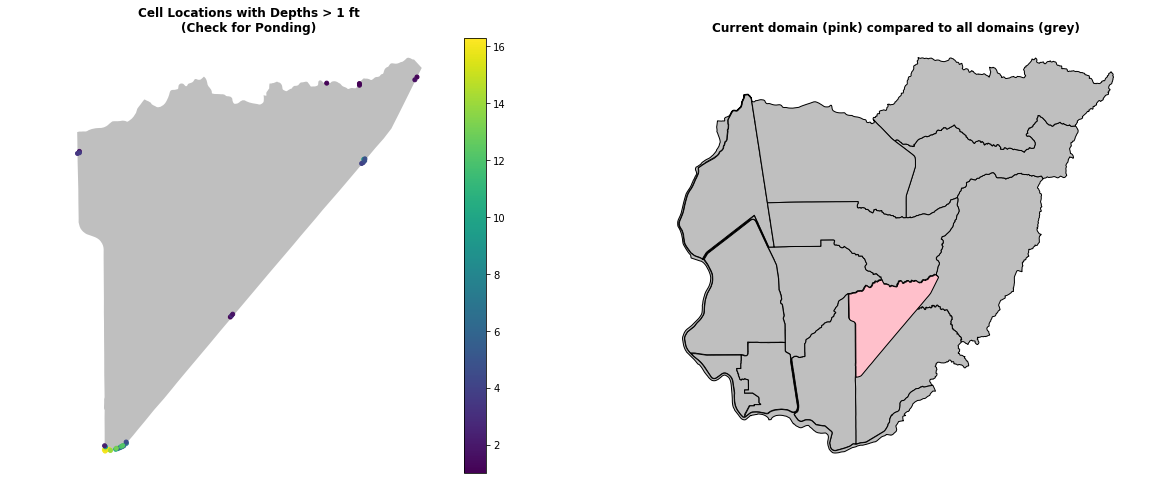

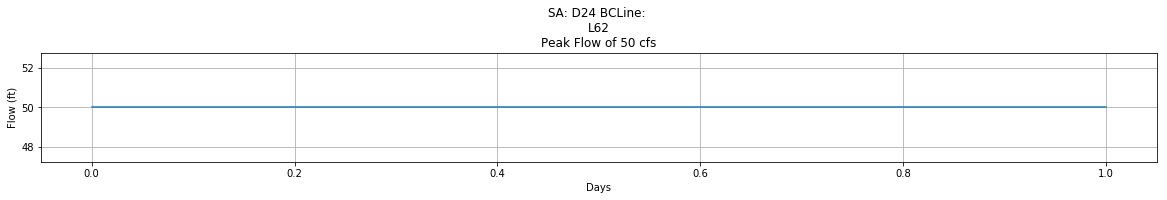

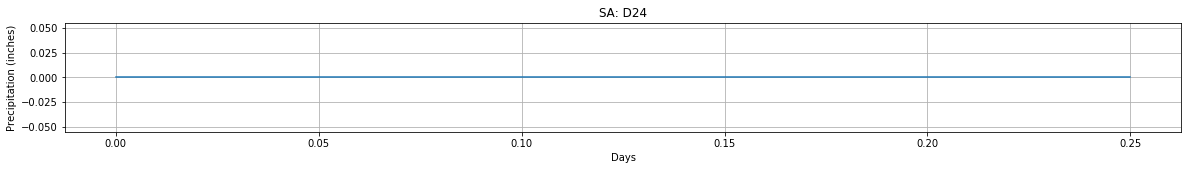

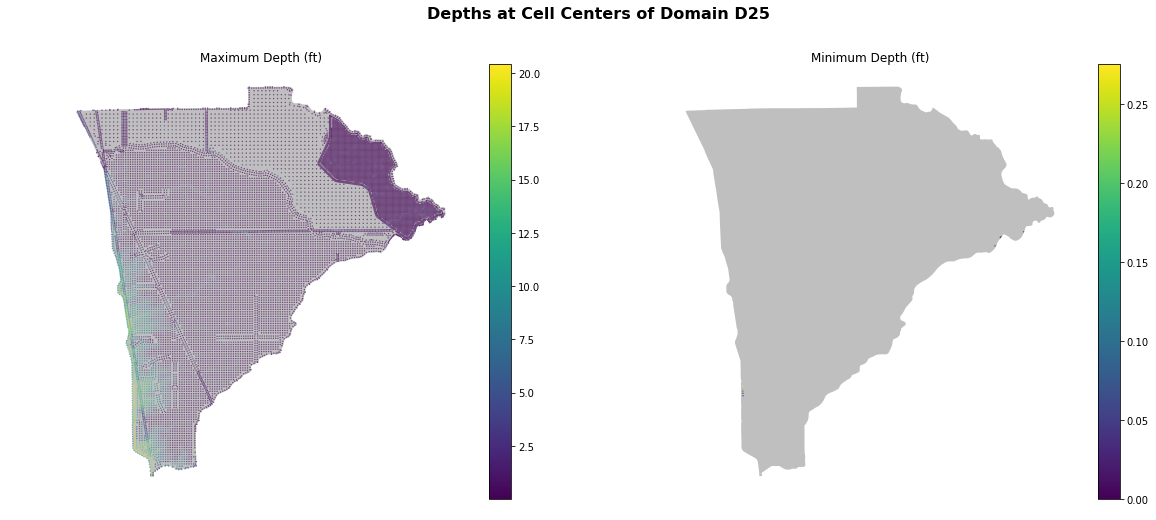

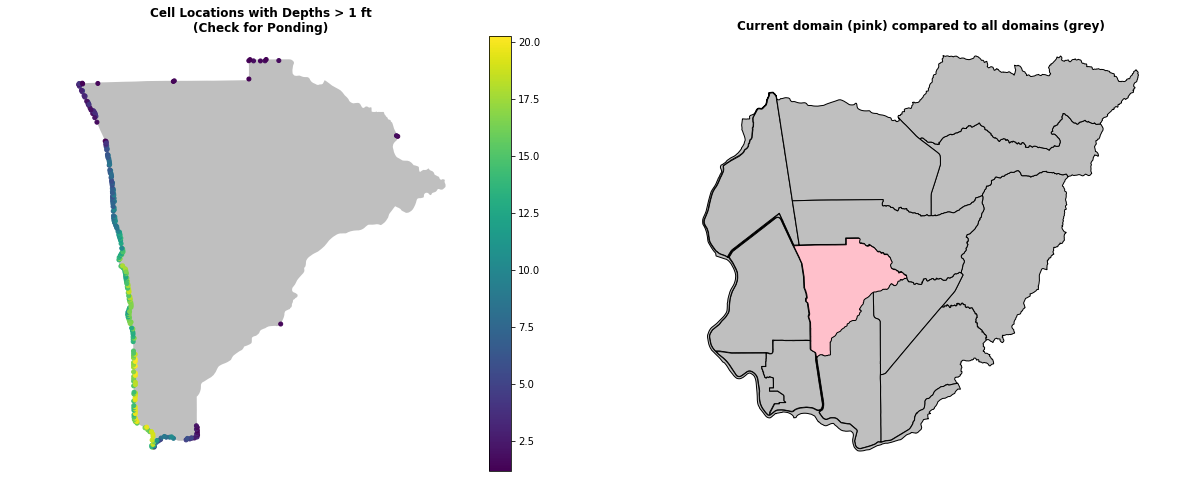

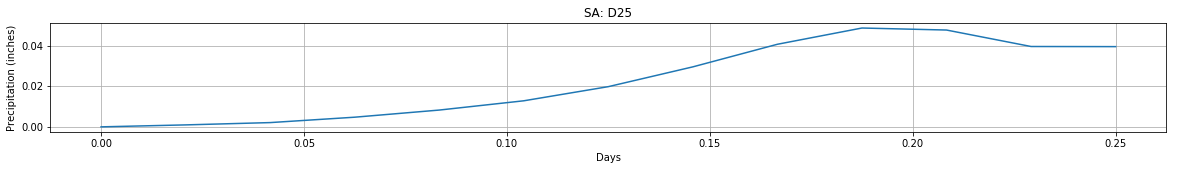

In [15]:
show_results(rasPlan.domains[1:3])

/home/jwall/anaconda3/envs/geos/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


No Velocity Errors Found in Domain D33
No Velocity Errors Found in Domain D34
No Velocity Errors Found in Domain D35
Domain ID: Out, Average Cell Size = 100.0


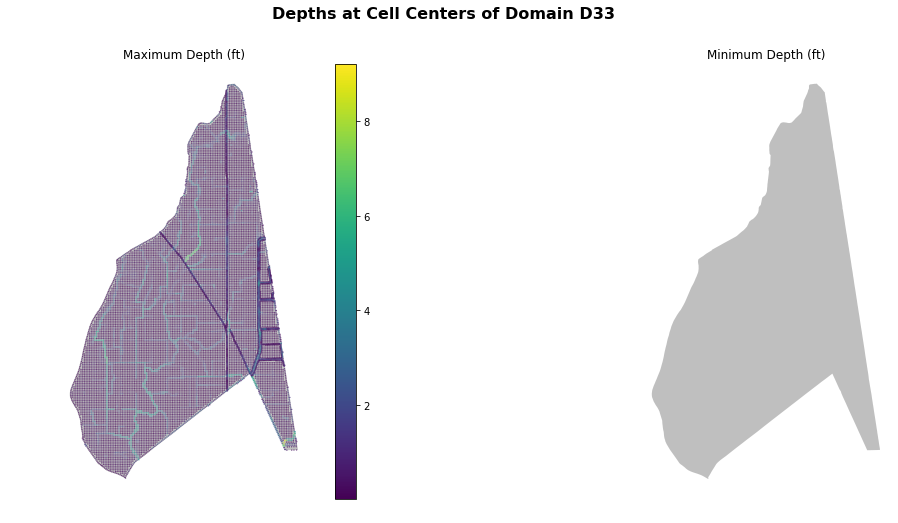

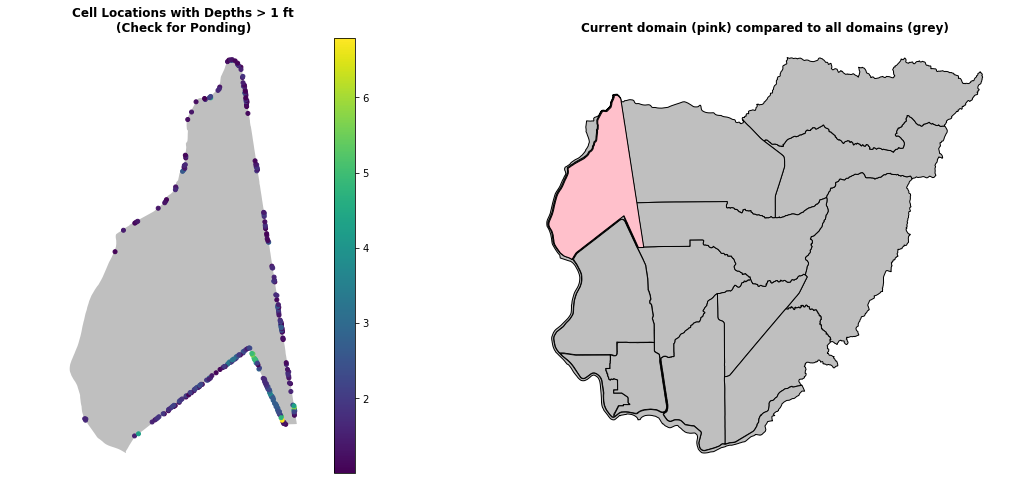

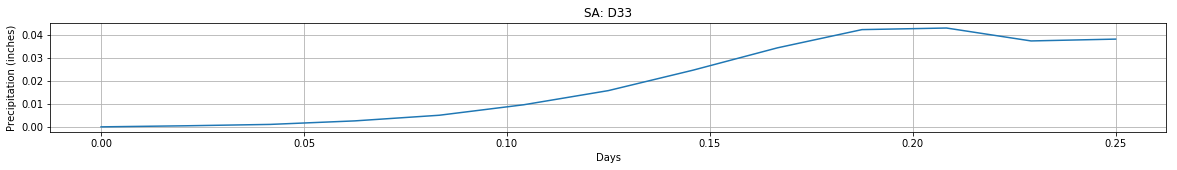

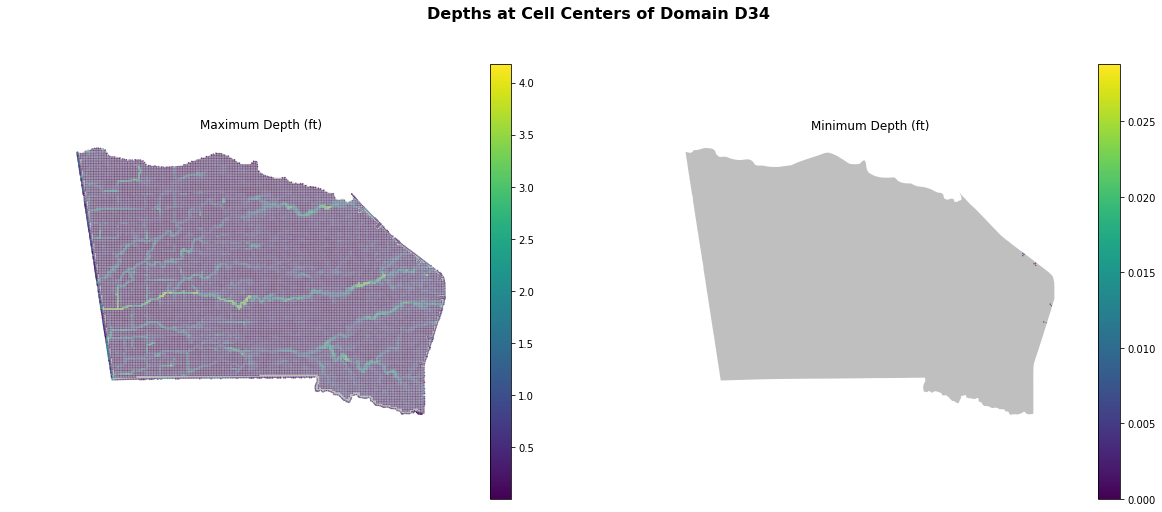

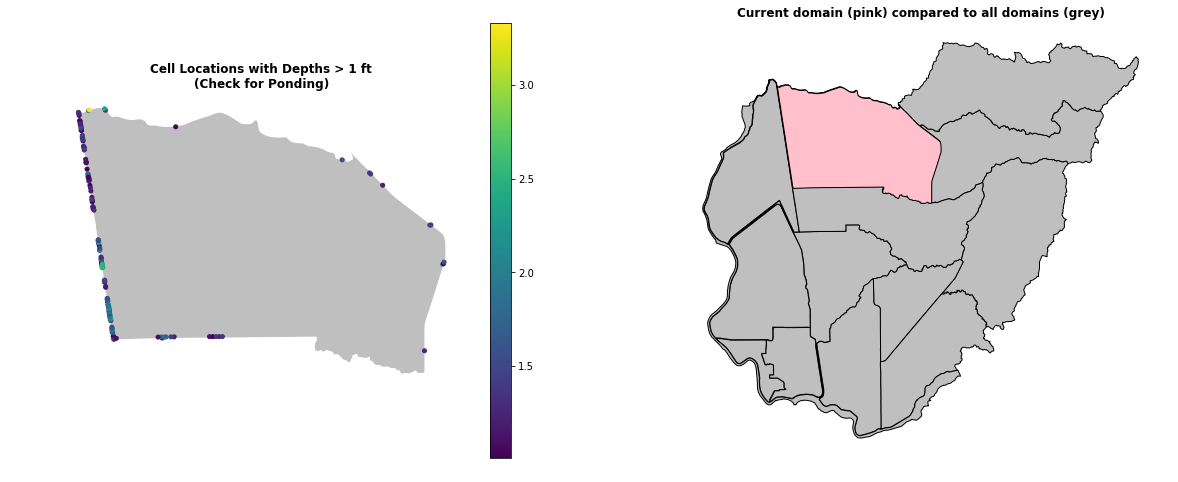

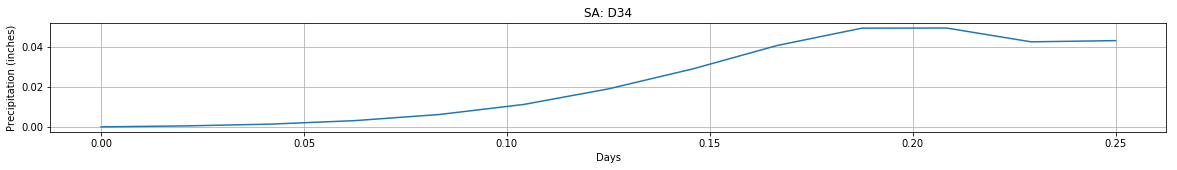

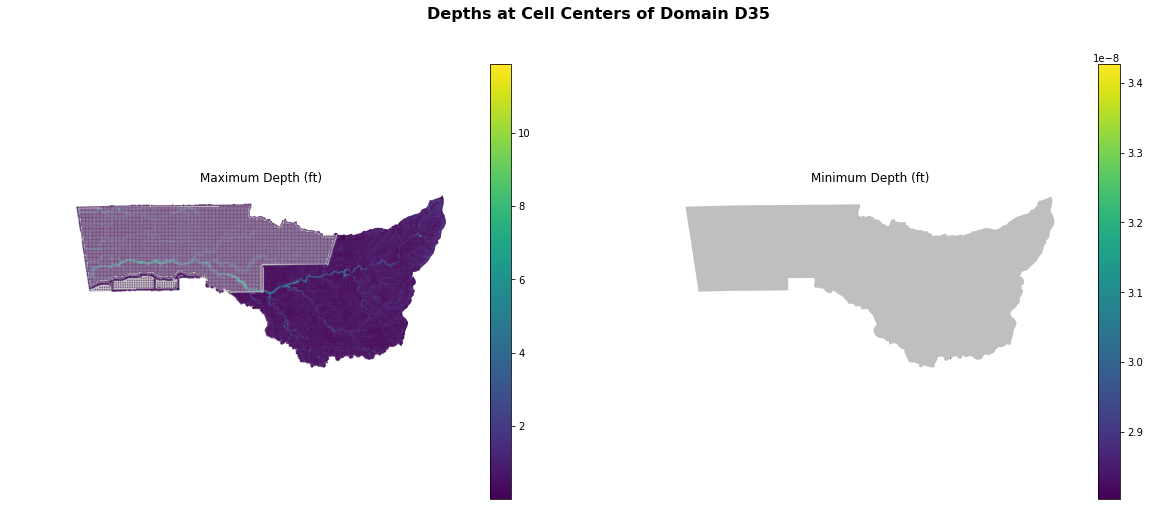

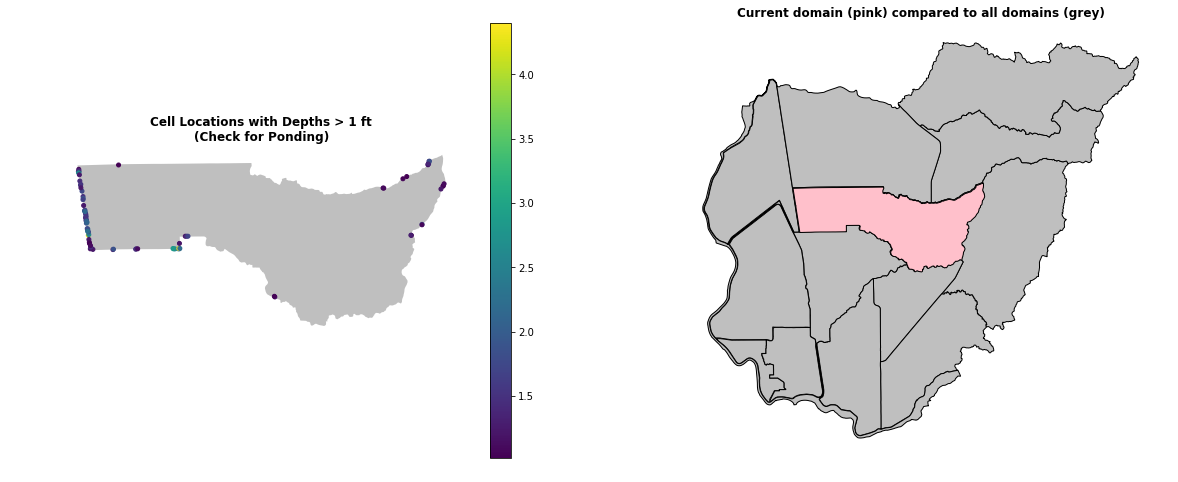

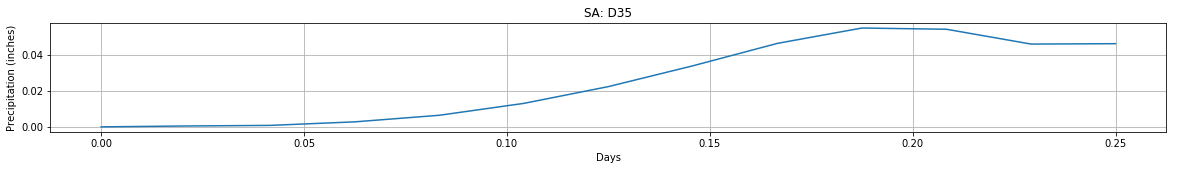

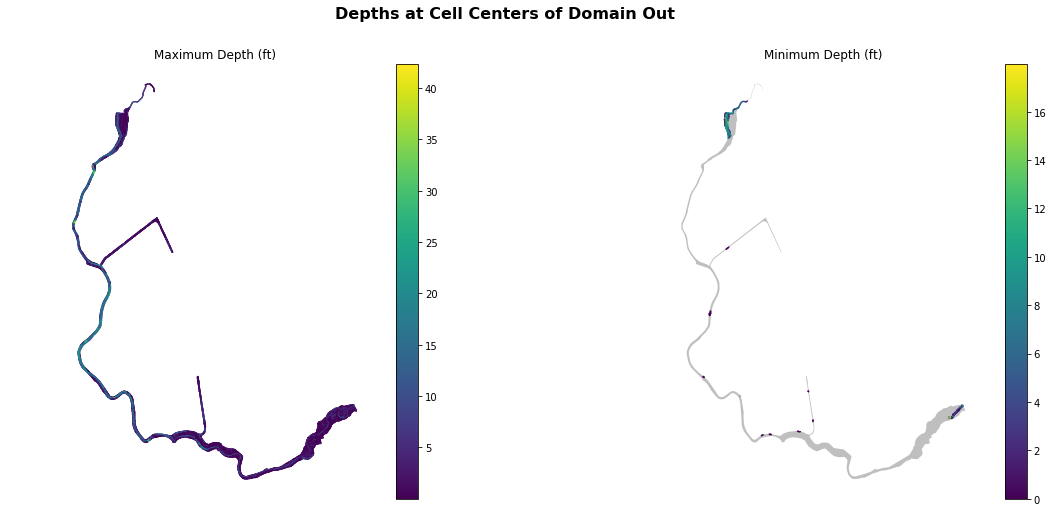

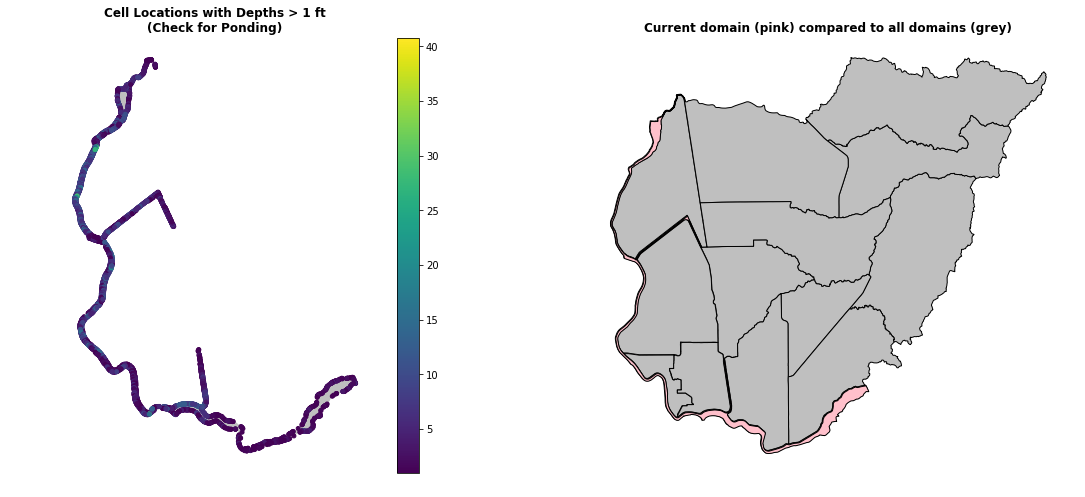

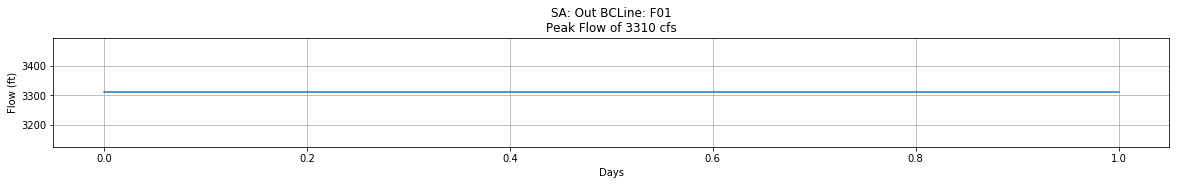

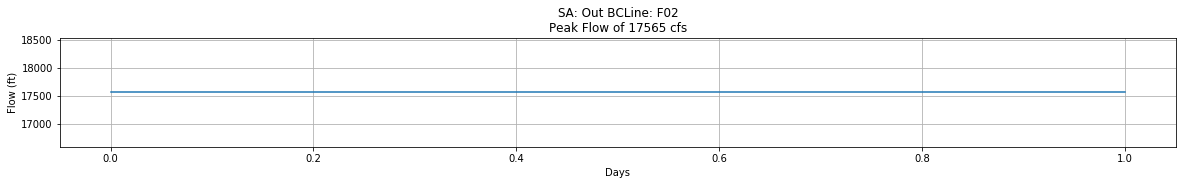

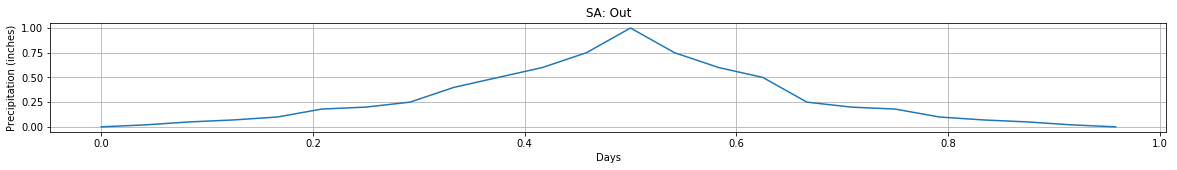

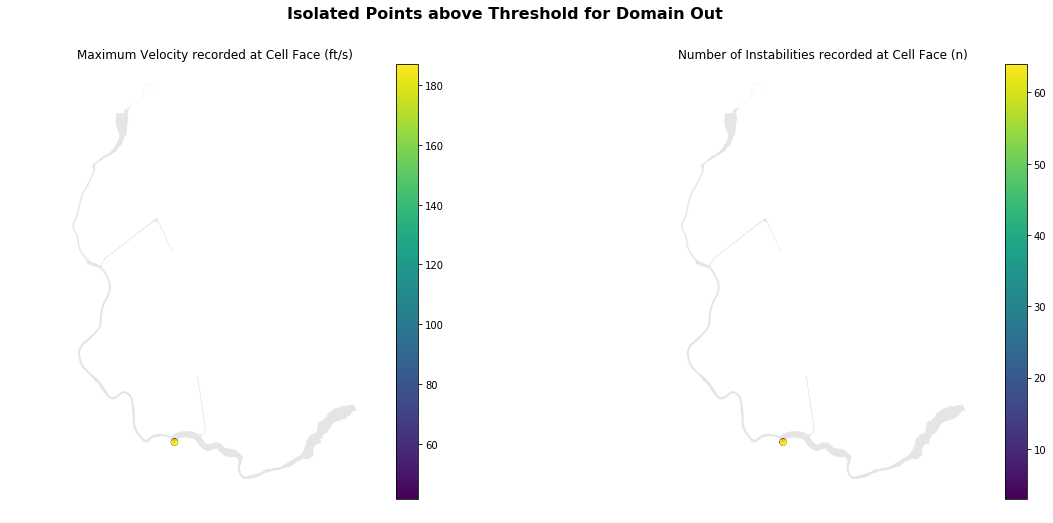

In [8]:
# Logic to handle one and many domains
if len(rasPlan.domains) > 1:
    results = {domainID: DomainResults(model, rasPlan, domainID) for domainID in rasPlan.domains[10:14]}
    for domain, result in results.items():
        plot_descriptive_stats(result.Describe_Depths, result.Perimeter, domain)
        plot_extreme_edges(result.Extreme_Edges, result.Perimeter, mini_map=rasPlan.domain_polys)
        plotBCs(result, domain) 
        velCheckMain(result, domain, plot_tseries=3)
    
else:
    results = DomainResults(model, rasPlan, rasPlan.domains[0])
    plot_descriptive_stats(results.Describe_Depths, results.Perimeter)
    plot_extreme_edges(results.Extreme_Edges, results.Perimeter)
    plotBCs(results)
    velCheckMain(result, rasPlan.domains[0], plot_tseries=3)

### 2A. Computational Summary



In [9]:
rasPlan.summary

,Results
Computation Time DSS,00:00:02
Computation Time Total,02:54:27
Maximum WSEL Error,0
Run Time Window,15AUG2019 18:32:45 to 15AUG2019 21:27:09
Solution,Unsteady Finished Successfully
Time Solution Went Unstable,NaN
Time Stamp Solution Went Unstable,Not Applicable
Vol Accounting,Volume Accounting in Acre Feet
Vol Accounting 2D Bdry,0
Vol Accounting Cell End,60303


# END